# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
ff_data=pd.read_csv('/content/sample_data/forestfires.csv')
ff_data
   

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Data Exploration

In [6]:
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
# Drop the features which is not requried in visualization
data=ff_data.drop(ff_data.iloc[:, 11:30], axis = 1)
data.head(1)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


As we show that mean of DC is heigh that means data are not in same scale so we need to standardize the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


#### All the columns data types are correctly identified

In [10]:
# checking for nll values 
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [11]:
# checking for duplicate values
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [12]:
# Droping of duplicate
df=data.copy()
df=data.drop_duplicates()
df.shape

(509, 12)

In [13]:
# List of Numerical Variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))
print('Numeric variables are',numerical_features)


Number of numerical variables: 9
Numeric variables are ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [14]:
# List of Categorical Variables
categorical=[variable for variable in df.columns if df[variable].dtype=='O']
print('Number of categorical variables',len(categorical))
print('categorical variables are',categorical)

Number of categorical variables 3
categorical variables are ['month', 'day', 'size_category']


In [15]:
# checking for cardinality in categorical variables
for var in categorical:
  print( var,'contains',len(df[var].unique()),'labels')

month contains 12 labels
day contains 7 labels
size_category contains 2 labels


##### We can see that none of the columns contains large number of lables so we use dummies encoder

## Exploratory Data Analysis

In [16]:
# correlation between numeric data
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

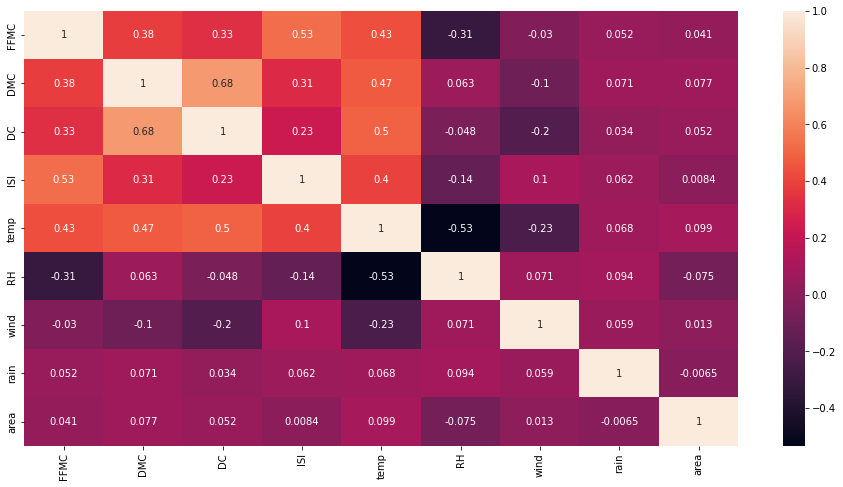

In [17]:
# Heatmap for numerical values for correlation
fig=plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True);
plt.xticks(rotation=90)

Their is no correlation between numeric features

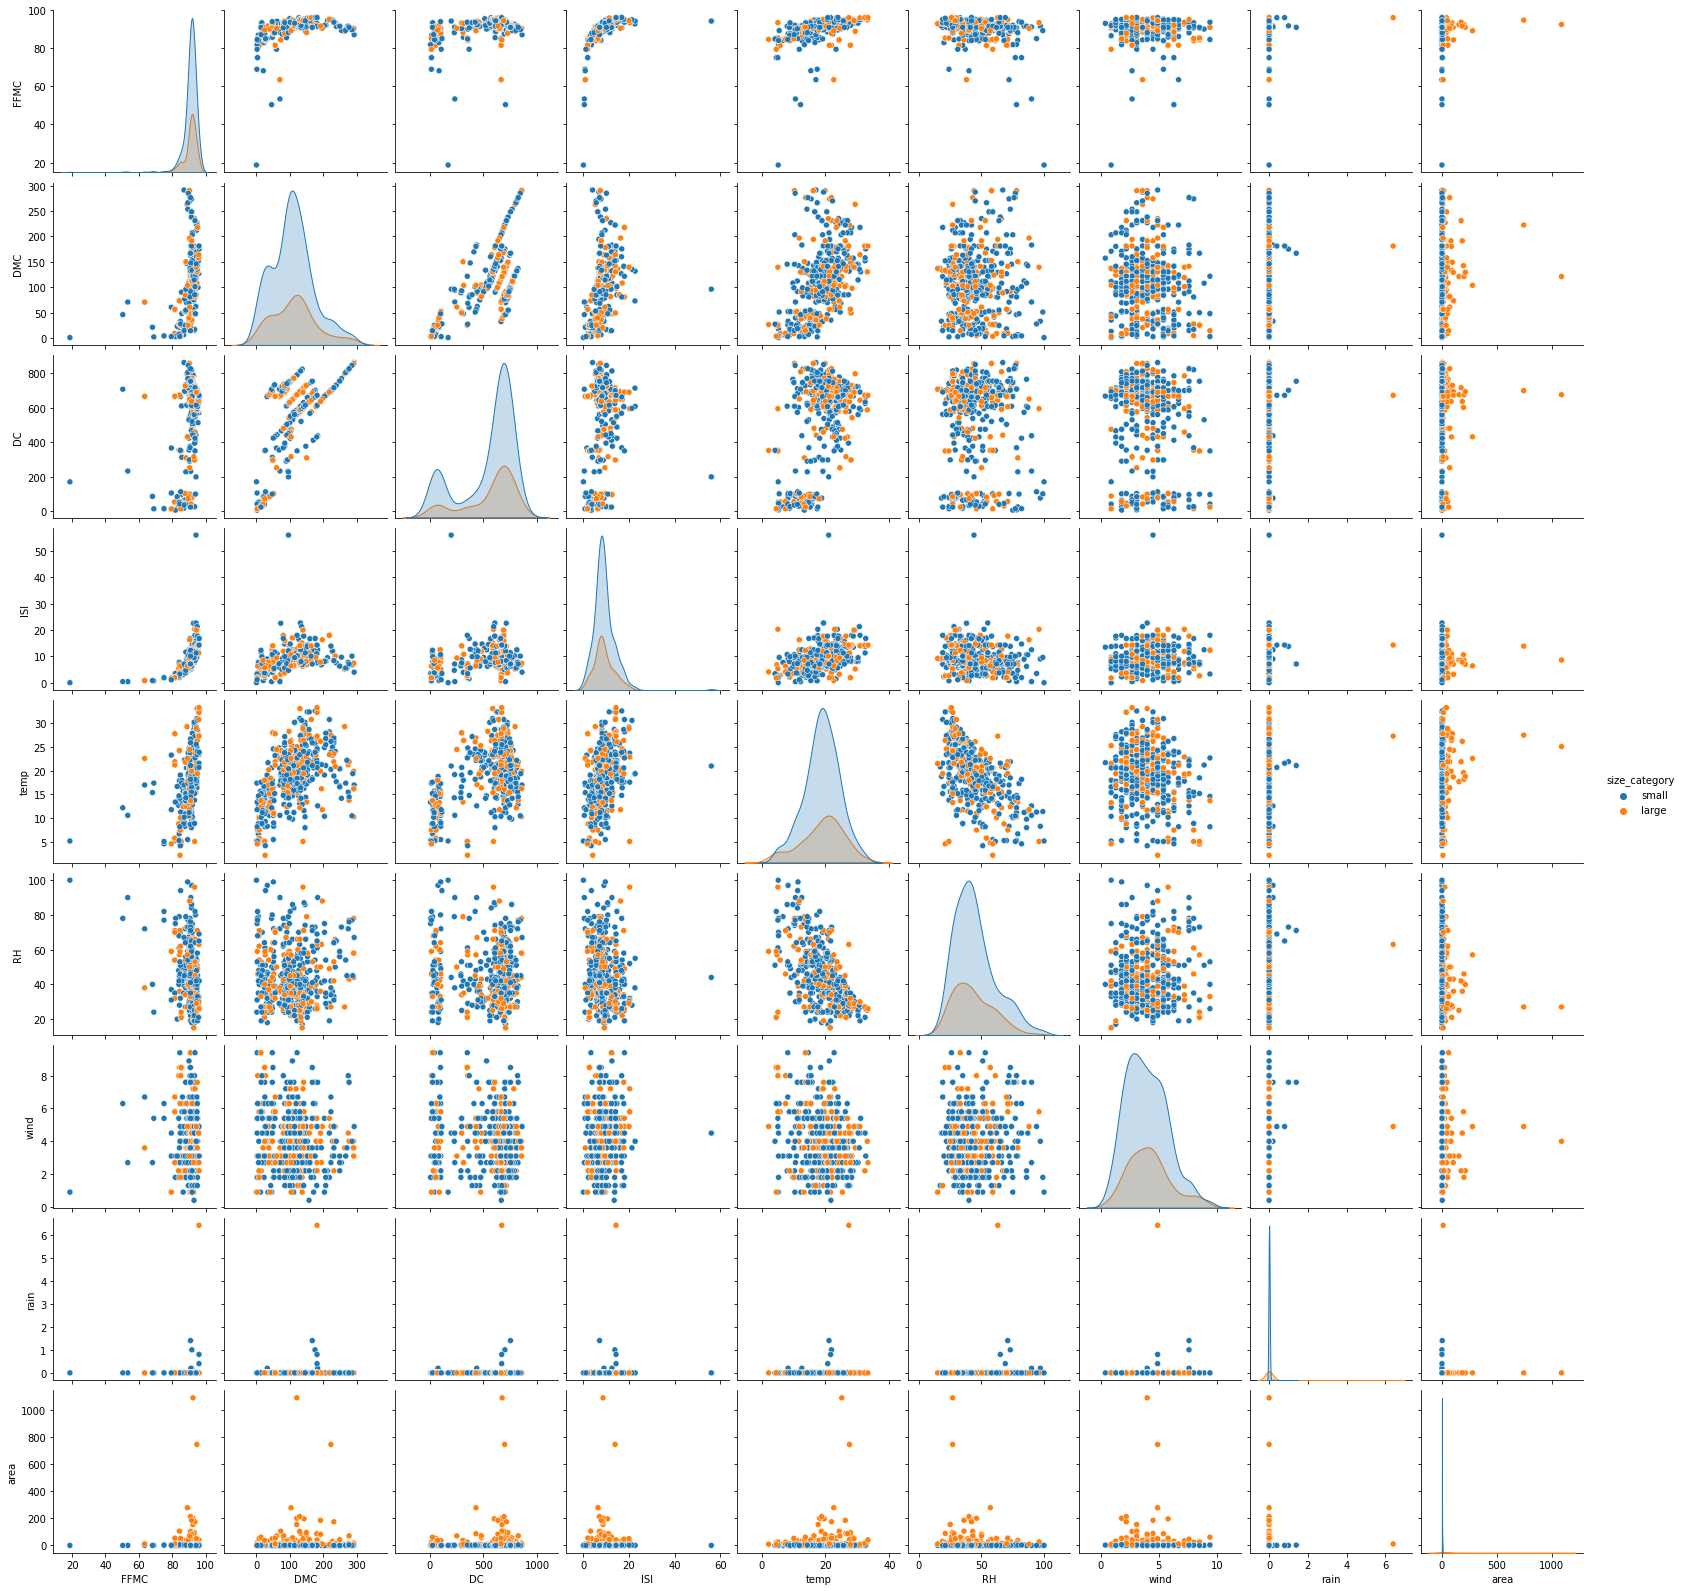

In [18]:
# pair plot data 
sns.pairplot(data=df,hue='size_category')

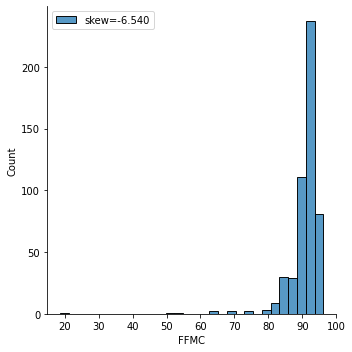

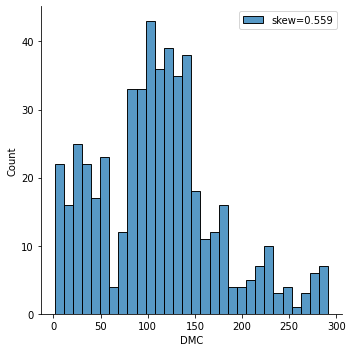

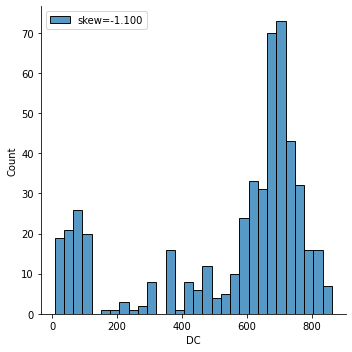

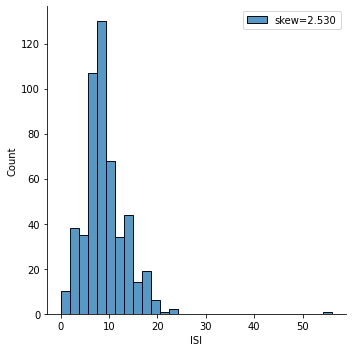

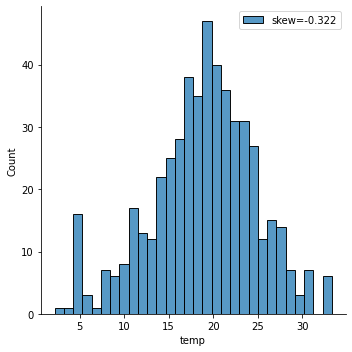

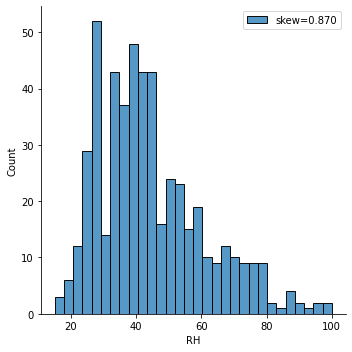

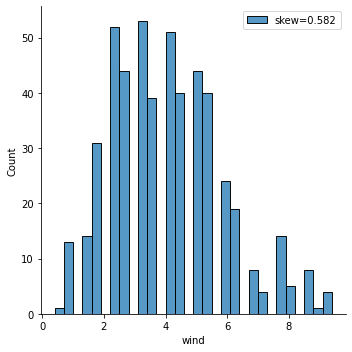

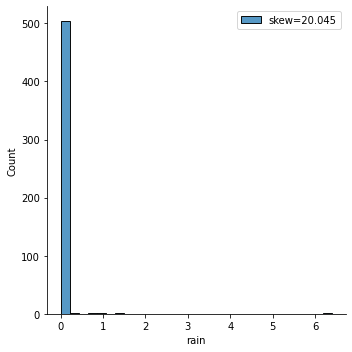

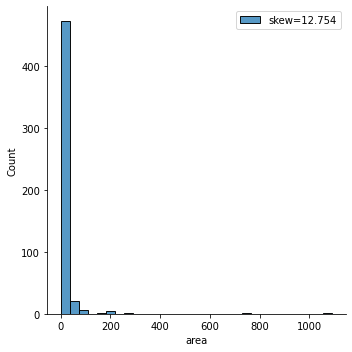

In [19]:
# Histogram for visualization of numeric variables
for feat in numerical_features:
  skew = df[feat].skew()
  sns.displot(df[feat],kde = False,label='skew=%.3f' %(skew),bins=30)
  plt.legend(loc='best')
  plt.show()

None of the feature are normally distributed.FFMC,rain and area are highly skewed

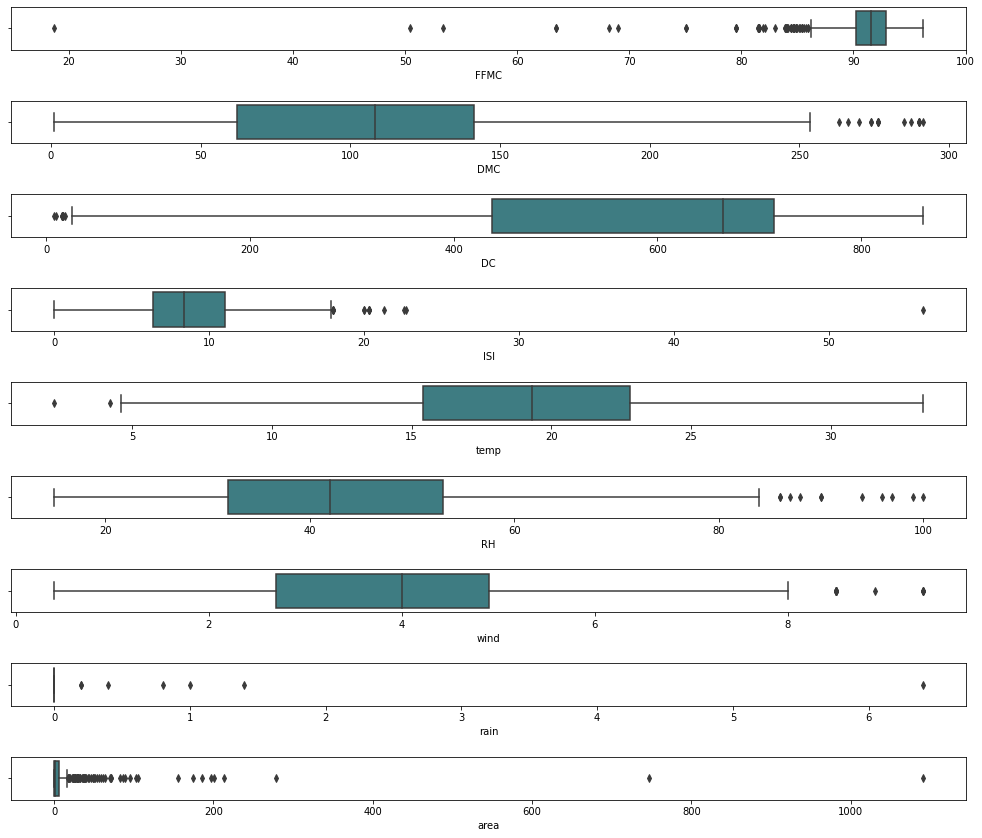

In [20]:
# Implementation of Boxplot for visualization of outlier
fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=df,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=df,palette='crest',ax=axes[5])
sns.boxplot(x='wind',data=df,palette='crest',ax=axes[6])
sns.boxplot(x='rain',data=df,palette='crest',ax=axes[7])
sns.boxplot(x='area',data=df,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

As we show that all numerical features contains outliers so we need to remove it.
And we also observe that temperature is in between 15 degree to 23 degree and wind is approx 3km/h to 5km/h which is not so heigh due to which forest fire do not cover large area.

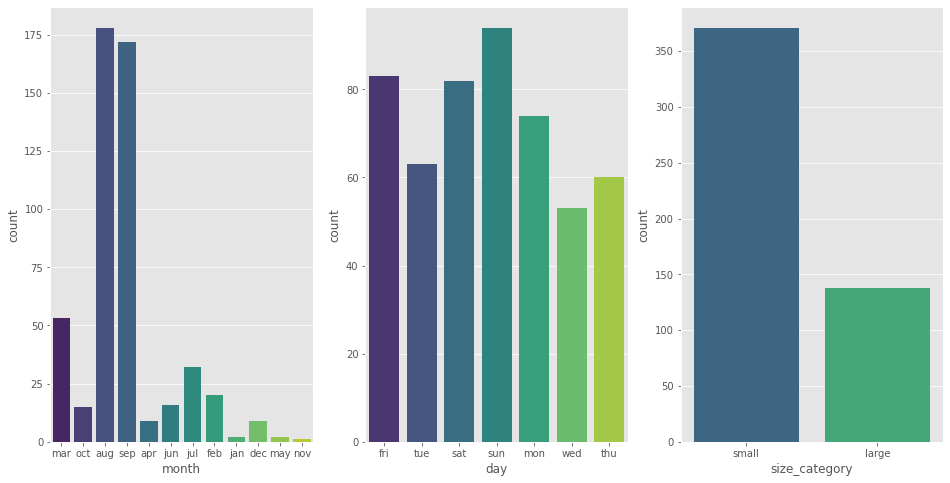

In [21]:
# Categorical features visualization by bar plot
plt.style.use("ggplot")
fig, ax =plt.subplots(1,3,squeeze=False, figsize=(16,8)) 
sns.countplot(df["month"], palette="viridis", ax=ax[0,0])
sns.countplot(df["day"], palette="viridis", ax=ax[0,1])
sns.countplot(df["size_category"], palette="viridis", ax=ax[0,2])
plt.show()

As we show that heigest number of forest fire is happned in august and september and from friday to monday cases are proportionaly higher.
We observe that number of small area damage is high while large area damage is low. 

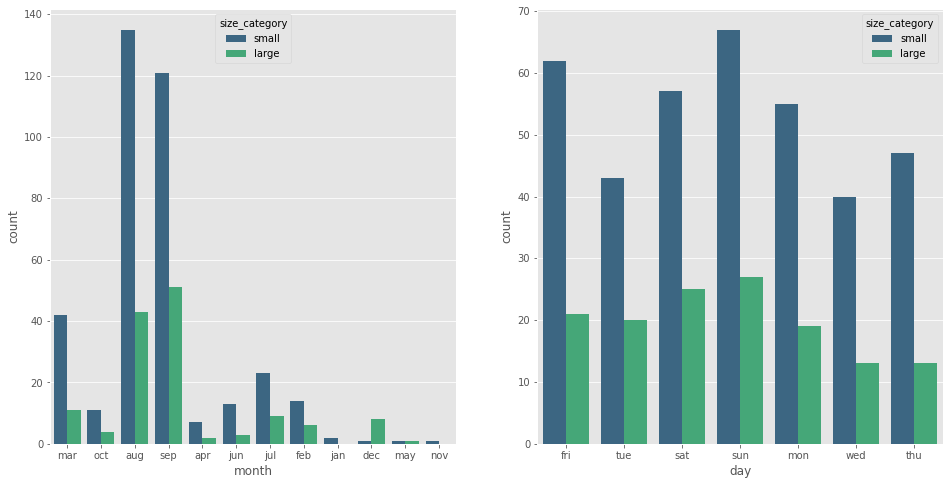

In [22]:
# plot of categorical features w.r.t. size_category
fig, ax =plt.subplots(1,2,squeeze=False, figsize=(16,8)) 
sns.countplot(x="month", data=df,palette="viridis", hue='size_category',ax=ax[0,0])
sns.countplot(x="day", data=df,palette="viridis", hue='size_category',ax=ax[0,1])
plt.show()


In [23]:
df['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

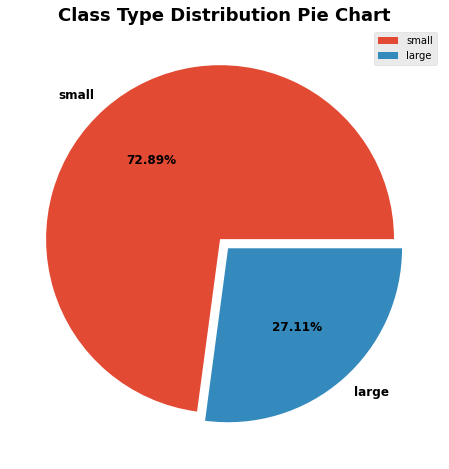

In [24]:
# pie plot for tax_val
plt.figure(figsize = (12,8))
plt.pie(df['size_category'].value_counts(),labels=df.size_category.unique(),explode = [0.04,0.03],autopct= '%.2f%%',
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Data pre-processing

In [25]:
# converting categorical into integer
new_data=df.copy()
new_data=pd.get_dummies(df,columns=['month','day'],drop_first=False)
new_data['size_category'] = np.where(new_data['size_category'].str.contains("large"), 1, 0)
new_data.tail()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,...,0,0,0,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,...,0,0,0,0,0,0,1,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
516,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,...,1,0,0,0,0,0,0,0,1,0


In [26]:
x = new_data.drop('size_category',axis=1)
y = new_data[['size_category']]

# Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std


array([[-0.79603981, -1.31838569, -1.82893094, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [-0.00325666, -1.1740525 ,  0.48925693, ..., -0.36555477,
         2.66070763, -0.34092238],
       [-0.00325666, -1.04383887,  0.56104493, ..., -0.36555477,
        -0.37583987, -0.34092238],
       ...,
       [-1.62485856, -0.8398898 ,  0.47514131, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [ 0.68141971,  0.56108339,  0.26985988, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [-2.00323234, -1.68235633, -1.77892132, ..., -0.36555477,
         2.66070763, -0.34092238]])

In [27]:
# Train_test Split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((356, 28), (356, 1), (153, 28), (153, 1))

## KFold Validation

In [28]:
from sklearn.model_selection import KFold,cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=None)



### Hyperparameter Tuning:  Batch Size and Epochs

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [40]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [41]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40,50]
epochs = [10,50,100,200]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=cv,n_jobs = -1, verbose = 1)


In [42]:
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [43]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9184272170066834, using {'batch_size': 20, 'epochs': 50}
0.8818857669830322,0.04439461069144261 with {'batch_size': 10, 'epochs': 10}
0.9016431927680969,0.02008929152983032 with {'batch_size': 10, 'epochs': 50}
0.9099765181541443,0.030524550874946873 with {'batch_size': 10, 'epochs': 100}
0.9156103253364563,0.02834548559630388 with {'batch_size': 10, 'epochs': 200}
0.8341158032417297,0.04945822297602048 with {'batch_size': 20, 'epochs': 10}
0.9184272170066834,0.022740895348809263 with {'batch_size': 20, 'epochs': 50}
0.9043818354606629,0.027537695767468104 with {'batch_size': 20, 'epochs': 100}
0.8987089157104492,0.0423245292981512 with {'batch_size': 20, 'epochs': 200}
0.7442097067832947,0.08461578052575205 with {'batch_size': 40, 'epochs': 10}
0.9183881044387817,0.040337658596038786 with {'batch_size': 40, 'epochs': 50}
0.9071596264839172,0.041543983553096436 with {'batch_size': 40, 'epochs': 100}
0.9099765181541443,0.03752125111223138 with {'batch_size': 40, 'epochs': 200}
0.

### Hyperparameters:- Learning rate and Drop out rate

In [44]:
from keras.layers import Dropout

def create_model1(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [45]:

model = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 20,epochs = 50)
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2,0.3,0.4,0.5]
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid = GridSearchCV(estimator=model,param_grid=param_grids,cv=cv,n_jobs = -1, verbose = 1)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [46]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.904460096359253, using {'dropout_rate': 0.4, 'learning_rate': 0.01}
0.8538341283798218,0.049493843277316554 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9044209718704224,0.03510060605119755 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8344287991523742,0.03932217362228918 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8369326949119568,0.058415873842836655 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9016823172569275,0.026729087789495683 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8175273895263672,0.08181296917113247 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8200704097747803,0.06658934587288935 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.898826289176941,0.016671625200259072 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7641627550125122,0.08381972911770585 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.8285211205482483,0.05828076321250303 with: {'dropout_rate': 0.3, 'learning_rate': 0.001}
0.8988654136657714,

## Hyperparameters:- Activation Function and Kernel Initializer

In [130]:
def create_model2(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.4))
    model.add(Dense(8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.4))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [131]:
model = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grids = dict(activation_function = activation_function,init = init)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv,n_jobs = -1, verbose = 1)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [132]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9494913935661315, using {'activation_function': 'linear', 'init': 'normal'}
0.8539514899253845,0.051571361107055604 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8400234818458557,0.0518396778855004 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8371283173561096,0.04485889099462278 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9186228513717651,0.038991948704480875 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9214397549629212,0.018553680798514056 with: {'activation_function': 'relu', 'init': 'normal'}
0.7163145542144775,0.041971531332270925 with: {'activation_function': 'relu', 'init': 'zero'}
0.9410798192024231,0.02398963687113049 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9410406947135925,0.024143941978050587 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7163145542144775,0.041971531332270925 with: {'activation_function': 'tanh', 'init': 'zero'}
0.941001558303833,0.030092562516364194 with: {'ac

##  Hyperparameter :-Number of Neurons in activation layer

In [133]:

def create_model2(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim =28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.4))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.4))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [134]:

model = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs =50)
neuron1 =[6,8,12,16]
neuron2 = [2,4,6,8]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv,n_jobs = -1, verbose = 1)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [135]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9465962529182435, using {'neuron1': 6, 'neuron2': 4}
0.9241392731666564,0.027642556585536864 with: {'neuron1': 6, 'neuron2': 2}
0.9465962529182435,0.01650721123710121 with: {'neuron1': 6, 'neuron2': 4}
0.941001558303833,0.02425210269495376 with: {'neuron1': 6, 'neuron2': 6}
0.943818473815918,0.015431990369743905 with: {'neuron1': 6, 'neuron2': 8}
0.941001558303833,0.01871139881654044 with: {'neuron1': 8, 'neuron2': 2}
0.9409624338150024,0.020796840825870373 with: {'neuron1': 8, 'neuron2': 4}
0.926917040348053,0.030165715299388645 with: {'neuron1': 8, 'neuron2': 6}
0.9354068994522095,0.014291867134472096 with: {'neuron1': 8, 'neuron2': 8}
0.9381064057350159,0.03170356645667004 with: {'neuron1': 12, 'neuron2': 2}
0.935367751121521,0.02461296005319062 with: {'neuron1': 12, 'neuron2': 4}
0.9325117349624634,0.016607046227968224 with: {'neuron1': 12, 'neuron2': 6}
0.9269561767578125,0.02425778419585857 with: {'neuron1': 12, 'neuron2': 8}
0.9381455302238464,0.030416048722498583 with:

## Model Bulding Using Best Parameters

In [136]:
model = Sequential()
model.add(Dense(6,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
model.add(Dropout(0.4))
model.add(Dense(4,input_dim = 6,kernel_initializer = 'normal',activation = 'linear'))
model.add(Dropout(0.4))
model.add(Dense(1,activation = 'sigmoid'))
adam = Adam(lr = 0.01)
model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

history = model.fit(x_train,y_train,validation_split=0.33, batch_size = 20, epochs = 50)


Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 0.6562 - accuracy: 0.6807 - val_loss: 0.6337 - val_accuracy: 0.7034
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5756 - accuracy: 0.7311 - val_loss: 0.6277 - val_accuracy: 0.7203
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5321 - accuracy: 0.7605 - val_loss: 0.6515 - val_accuracy: 0.7203
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5020 - accuracy: 0.7899 - val_loss: 0.6709 - val_accuracy: 0.7119
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7983 - val_loss: 0.7123 - val_accuracy: 0.7288
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.7983 - val_loss: 0.7418 - val_accuracy: 0.7288
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4395 - accuracy: 0.8277 - val_loss: 0.7352 - val_accuracy: 0.7627
Epoch 8/50
12/12 [=

### Check for overfitting and underfitting

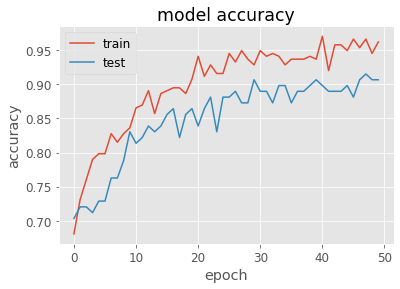

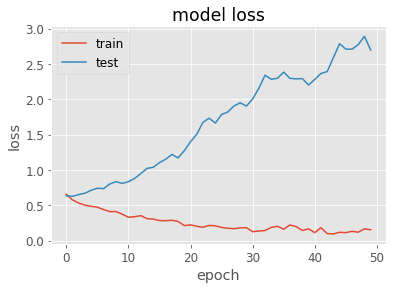

In [137]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Predicting values from Model using same dataset

In [138]:
# generating predictions for train data
predict_train = model.predict(x_train)

# generating predictions for test data
predict_test = model.predict(x_test) 

print("Accuracy score for Train Data    = ", np.round(accuracy_score(y_train,predict_train.round()),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(y_train,predict_train.round()))
print("Classification Report for Train Data  =\n", classification_report(y_train,predict_train.round()))


Accuracy score for Train Data    =  96.0 %
Confusion Matrix for Train Data  =
 [[253   2]
 [ 12  89]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       255
           1       0.98      0.88      0.93       101

    accuracy                           0.96       356
   macro avg       0.97      0.94      0.95       356
weighted avg       0.96      0.96      0.96       356



In [139]:

print("Accuracy score for Test Data    = ", np.round(accuracy_score(y_test,predict_test.round()),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(y_test,predict_test.round()))
print("Classification Report for Test Data  =\n", classification_report(y_test,predict_test.round()))

Accuracy score for Test Data    =  94.0 %
Confusion Matrix for Test Data  =
 [[113   3]
 [  6  31]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       116
           1       0.91      0.84      0.87        37

    accuracy                           0.94       153
   macro avg       0.93      0.91      0.92       153
weighted avg       0.94      0.94      0.94       153



###  ROC - AUC Curve

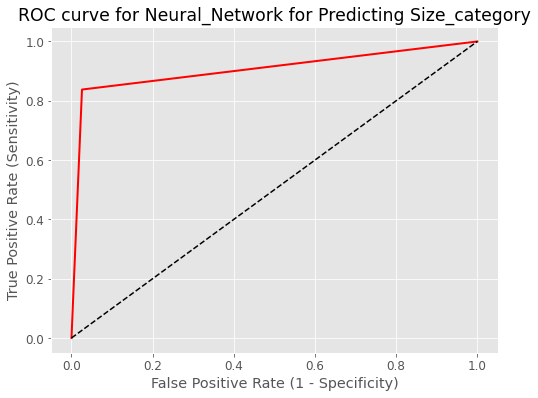

ROC AUC : 0.9291


In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,predict_test.round())

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Neural_Network for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test,predict_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


##  Conclusion
+ As we show that heigest number of forest fire is happned in august and september and from friday to monday cases are proportionaly higher.We observe that number of small area damage is high while large area damage is low.
+ when we tune hyperparameters for model bulding it gives
+ batch_size=20
+ epochs=50
+ learning rate= 0.01
+ drop out rate= 0.4
+ dense layer1= 6
+ dense layer2= 4
+ activation function = linear
+ kernal initilazer= normal

+ ROC AUC of our model is very close to 1. So, we conclude that our Model do a good job in predicting wheather the damage area is large or small